In [2]:
import os
import pickle
import numpy as np
import tensorflow as tf

# Import project modules
from conllu_reader import ConlluReader
from algorithm import ArcEager, Transition, Sample
from conllu_token import Token
from model import ParserMLP

from DPUtils import plot_history


# Check for GPU availability (Optional)
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-12-05 14:45:03.834296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-05 14:45:03.927798: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-05 14:45:03.962187: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-05 14:45:04.145730: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.17.0
Num GPUs Available:  1


I0000 00:00:1764945908.864670     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945909.273197     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945909.273232     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
dataset_path = "dataset.pkl"

if not os.path.exists(dataset_path):
    print(f"Error: '{dataset_path}' not found. Please run main.py first to generate it.")
else:
    print(f"Loading dataset from {dataset_path}...")
    with open(dataset_path, "rb") as f:
        data = pickle.load(f)
        
    training_samples = data["training_samples"]
    dev_samples = data["dev_samples"]
    deprels = data["deprels"]
    actions = data["actions"]
    
    print("Dataset loaded successfully!")
    print(f"Training Samples: {len(training_samples)}")
    print(f"Development Samples: {len(dev_samples)}")
    print(f"Unique Dependency Labels: {len(deprels)}")

Loading dataset from dataset.pkl...
Dataset loaded successfully!
Training Samples: 81182
Development Samples: 4978
Unique Dependency Labels: 43


In [4]:
# Inspect the first training sample
sample = training_samples[80000]

print(f"--- Sample 1 ---")
# Note: Accessing internal state for visualization
print(f"State Stack: {[t.form for t in sample.state.S]}")
print(f"State Buffer (first 3): {[t.form for t in sample.state.B[:3]]}...")
print(f"Gold Transition: {sample.transition}")

--- Sample 1 ---
State Stack: ['ROOT', 'The']
State Buffer (first 3): ['revolution', 'in', 'the']...
Gold Transition: LEFT-ARC-det


In [5]:
# Extract features from the loaded sample
feats = sample.state_to_feats(nstack_feats=3, nbuffer_feats=3)

print("Feature List:", feats)

# Expected output format: 
# [Stack_Word_1, Stack_Word_0, Buffer_Word_0, Buffer_Word_1, 
#  Stack_UPOS_1, Stack_UPOS_0, Buffer_UPOS_0, Buffer_UPOS_1]

Feature List: ['The', 'ROOT', '<PAD>', 'revolution', 'in', 'the', 'DET', 'ROOT_UPOS', '<PAD>', 'NOUN', 'ADP', 'DET']


In [6]:
# Initialize Model
# You can adjust dimensions and epochs as needed
model = ParserMLP(word_emb_dim=200, hidden_dim=512, epochs=50, batch_size=64, learning_rate=0.0005)

print("Starting training...")
# The train function handles vocabulary building and vectorization internally
history = model.train(training_samples, dev_samples)

Starting training...
Building vocabulary...
Vocab built: 6872 words, 20 UPOS tags.
Detected Feature Shape: 4 words, 4 tags.
Vectorizing data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 words_input (InputLayer)    [(None, 4)]                  0         []                            
                                                                                                  
 upos_input (InputLayer)     [(None, 4)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 4, 200)               1374400   ['words_input[0][0]']         
                                                                                                  
 embedding_1 (Embedding)     (None, 4, 50)       

I0000 00:00:1764945910.646514     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945910.646788     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945910.646829     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945910.839558     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945910.839600     134 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-05

Epoch 1/50


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

   2/1269 [..............................] - ETA: 1:44 - loss: 4.1890 - action_output_loss: 1.3820 - deprel_output_loss: 3.7427 - action_output_accuracy: 0.2422 - deprel_output_accuracy: 0.0703 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


   6/1269 [..............................] - ETA: 1:20 - loss: 4.1533 - action_output_loss: 1.3714 - deprel_output_loss: 3.7092 - action_output_accuracy: 0.3151 - deprel_output_accuracy: 0.2969

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


   9/1269 [..............................] - ETA: 1:36 - loss: 4.1171 - action_output_loss: 1.3624 - deprel_output_loss: 3.6728 - action_output_accuracy: 0.3611 - deprel_output_accuracy: 0.3733

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  13/1269 [..............................] - ETA: 1:24 - loss: 4.0673 - action_output_loss: 1.3472 - deprel_output_loss: 3.6269 - action_output_accuracy: 0.4339 - deprel_output_accuracy: 0.3966

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  18/1269 [..............................] - ETA: 1:19 - loss: 3.9852 - action_output_loss: 1.3327 - deprel_output_loss: 3.5367 - action_output_accuracy: 0.4583 - deprel_output_accuracy: 0.4210

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  22/1269 [..............................] - ETA: 1:22 - loss: 3.9020 - action_output_loss: 1.3207 - deprel_output_loss: 3.4417 - action_output_accuracy: 0.4716 - deprel_output_accuracy: 0.4347

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  24/1269 [..............................] - ETA: 1:24 - loss: 3.8569 - action_output_loss: 1.3150 - deprel_output_loss: 3.3891 - action_output_accuracy: 0.4759 - deprel_output_accuracy: 0.4388

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  42/1269 [..............................] - ETA: 57s - loss: 3.3985 - action_output_loss: 1.2080 - deprel_output_loss: 2.9207 - action_output_accuracy: 0.5275 - deprel_output_accuracy: 0.4602

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  46/1269 [>.............................] - ETA: 57s - loss: 3.3094 - action_output_loss: 1.1768 - deprel_output_loss: 2.8435 - action_output_accuracy: 0.5391 - deprel_output_accuracy: 0.4609

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  58/1269 [>.............................] - ETA: 48s - loss: 3.0664 - action_output_loss: 1.0917 - deprel_output_loss: 2.6329 - action_output_accuracy: 0.5692 - deprel_output_accuracy: 0.4696

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  73/1269 [>.............................] - ETA: 42s - loss: 2.8122 - action_output_loss: 0.9983 - deprel_output_loss: 2.4185 - action_output_accuracy: 0.6100 - deprel_output_accuracy: 0.4910

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  98/1269 [=>............................] - ETA: 35s - loss: 2.5172 - action_output_loss: 0.8854 - deprel_output_loss: 2.1758 - action_output_accuracy: 0.6555 - deprel_output_accuracy: 0.5225

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 115/1269 [=>............................] - ETA: 33s - loss: 2.3725 - action_output_loss: 0.8273 - deprel_output_loss: 2.0603 - action_output_accuracy: 0.6795 - deprel_output_accuracy: 0.5394

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 168/1269 [==>...........................] - ETA: 25s - loss: 2.0507 - action_output_loss: 0.7232 - deprel_output_loss: 1.7701 - action_output_accuracy: 0.7201 - deprel_output_accuracy: 0.5871

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 220/1269 [====>.........................] - ETA: 3:07 - loss: 1.8486 - action_output_loss: 0.6612 - deprel_output_loss: 1.5832 - action_output_accuracy: 0.7443 - deprel_output_accuracy: 0.6214

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

 687/1269 [===============>..............] - ETA: 36s - loss: 1.2145 - action_output_loss: 0.4871 - deprel_output_loss: 0.9699 - action_output_accuracy: 0.8127 - deprel_output_accuracy: 0.7414 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 877/1269 [===================>..........] - ETA: 19s - loss: 1.1161 - action_output_loss: 0.4581 - deprel_output_loss: 0.8774 - action_output_accuracy: 0.8243 - deprel_output_accuracy: 0.7605

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 15s 10ms/step - loss: 0.9874 - action_output_loss: 0.4184 - deprel_output_loss: 0.7586 - action_output_accuracy: 0.8393 - deprel_output_accuracy: 0.7846 - val_loss: 0.7502 - val_action_output_loss: 0.3567 - val_deprel_output_loss: 0.5247 - val_action_output_accuracy: 0.8724 - val_deprel_output_accuracy: 0.8335
Epoch 2/50
 110/1269 [=>............................] - ETA: 9s - loss: 0.5136 - action_output_loss: 0.2165 - deprel_output_loss: 0.3961 - action_output_accuracy: 0.9214 - deprel_output_accuracy: 0.8702

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 920/1269 [====================>.........] - ETA: 15s - loss: 0.4977 - action_output_loss: 0.2207 - deprel_output_loss: 0.3692 - action_output_accuracy: 0.9184 - deprel_output_accuracy: 0.8755 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 9s 7ms/step - loss: 0.4888 - action_output_loss: 0.2184 - deprel_output_loss: 0.3604 - action_output_accuracy: 0.9195 - deprel_output_accuracy: 0.8785 - val_loss: 0.7565 - val_action_output_loss: 0.3807 - val_deprel_output_loss: 0.5010 - val_action_output_accuracy: 0.8722 - val_deprel_output_accuracy: 0.8399
Epoch 3/50
 269/1269 [=====>........................] - ETA: 2:17 - loss: 0.3009 - action_output_loss: 0.1201 - deprel_output_loss: 0.2412 - action_output_accuracy: 0.9589 - deprel_output_accuracy: 0.9202

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 871/1269 [===================>..........] - ETA: 19s - loss: 0.3168 - action_output_loss: 0.1334 - deprel_output_loss: 0.2446 - action_output_accuracy: 0.9535 - deprel_output_accuracy: 0.9196 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 11s 8ms/step - loss: 0.3203 - action_output_loss: 0.1360 - deprel_output_loss: 0.2458 - action_output_accuracy: 0.9522 - deprel_output_accuracy: 0.9192 - val_loss: 0.8327 - val_action_output_loss: 0.4383 - val_deprel_output_loss: 0.5259 - val_action_output_accuracy: 0.8674 - val_deprel_output_accuracy: 0.8415


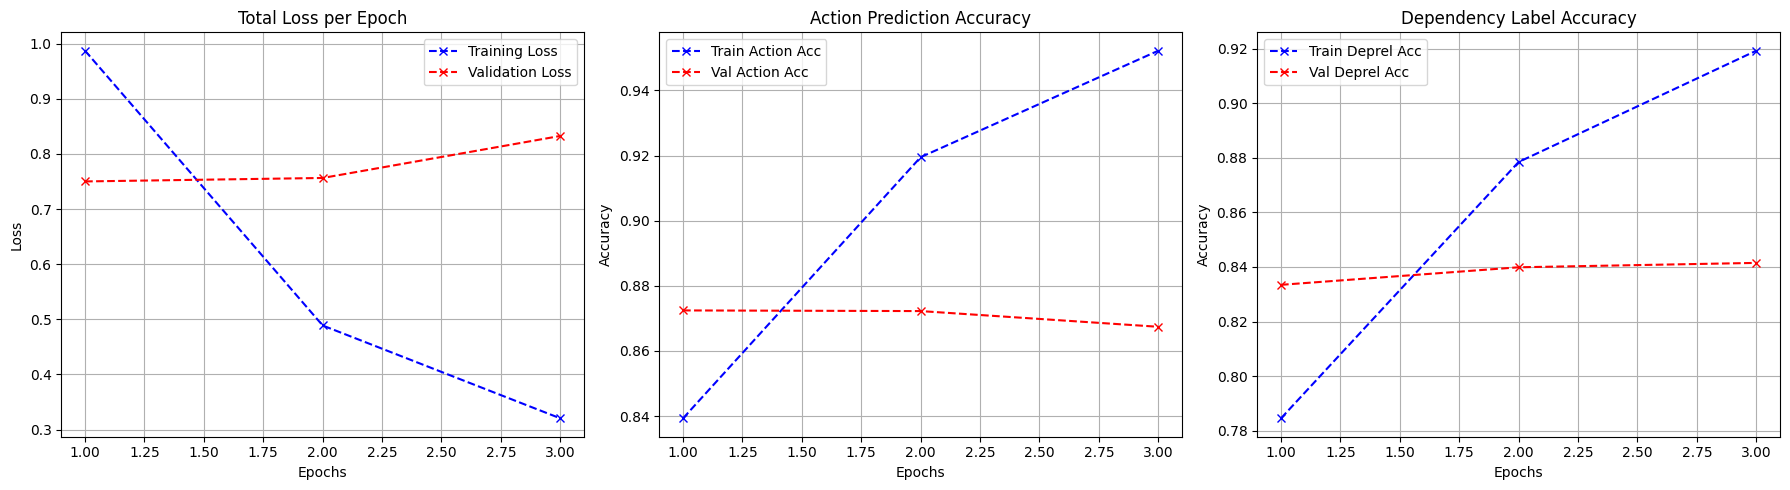

In [7]:
plot_history(history)

In [8]:
from conllu_reader import ConlluReader

# Initialize reader if not already done
reader = ConlluReader()

# Load the test set
# We use inference=True to ensure we treat this as unparsed data
print("Loading test set...")
test_trees = reader.read_conllu_file("en_partut-ud-test_clean.conllu", inference=True)
print(f"Loaded {len(test_trees)} sentences for testing.")

Loading test set...
Loaded 153 sentences for testing.


In [9]:
test_trees[1]

[0	ROOT	ROOT	ROOT_UPOS	ROOT_CPOS	ROOT_FEATS	_	_	_	_,
 1	Any	any	DET	DI	PronType=Ind	_	_	_	_,
 2	use	use	NOUN	S	Number=Sing	_	_	_	_,
 3	of	of	ADP	E	_	_	_	_	_,
 4	the	the	DET	RD	Definite=Def|PronType=Art	_	_	_	_,
 5	work	work	NOUN	S	Number=Sing	_	_	_	_,
 6	other	other	ADJ	A	Degree=Pos	_	_	_	_,
 7	than	than	SCONJ	CS	_	_	_	_	_,
 8	as	as	ADP	E	_	_	_	_	_,
 9	authorized	authorize	VERB	V	Tense=Past|VerbForm=Part	_	_	_	_,
 10	under	under	ADP	E	_	_	_	_	_,
 11	this	this	DET	DD	Number=Sing|PronType=Dem	_	_	_	_,
 12	license	license	NOUN	S	Number=Sing	_	_	_	_,
 13	or	or	CCONJ	CC	_	_	_	_	_,
 14	copyright	copyright	NOUN	S	Number=Sing	_	_	_	_,
 15	law	law	NOUN	S	Number=Sing	_	_	_	_,
 16	is	be	AUX	VA	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	_	_	_	_,
 17	prohibited	prohibit	VERB	V	Tense=Past|VerbForm=Part	_	_	_	_,
 18	.	.	PUNCT	FS	_	_	_	_	_]

In [10]:
# Conduct inference on the test set
print("Running inference on the test set...")
# The model.run method modifies the trees in-place or returns them
# It predicts the HEAD and DEPREL for each token
predicted_test_trees = model.run(test_trees)

print("Inference complete.")

Running inference on the test set...
Inference complete.


In [11]:
output_path = "output_three_feature_raw.conllu"

print(f"Saving raw predictions to {output_path}...")
reader.write_conllu_file(output_path, predicted_test_trees)
print("File saved.")

Saving raw predictions to output_three_feature_raw.conllu...
File saved.


In [12]:
from postprocessor import PostProcessor

post = PostProcessor()

print(f"Post-processing predictions in {output_path}...")

fixed_trees = post.postprocess(output_path)

final_output_path = "output_three_feature_fixed.conllu"
reader.write_conllu_file(final_output_path, fixed_trees)

print(f"Post-processing complete. Final predictions saved to {final_output_path}")

Post-processing predictions in output_three_feature_raw.conllu...
Post-processing complete. Final predictions saved to output_three_feature_fixed.conllu


In [13]:
# Run the evaluation script comparing the Gold Standard (test_clean) against your Fixed Output
# -v provides verbose output
!python conll18_ud_eval.py en_partut-ud-test_clean.conllu output_three_feature_fixed.conllu -v

Metric     | Precision |    Recall |  F1 Score | AligndAcc
-----------+-----------+-----------+-----------+-----------
Tokens     |    100.00 |    100.00 |    100.00 |
Sentences  |    100.00 |    100.00 |    100.00 |
Words      |    100.00 |    100.00 |    100.00 |
UPOS       |    100.00 |    100.00 |    100.00 |    100.00
XPOS       |    100.00 |    100.00 |    100.00 |    100.00
UFeats     |    100.00 |    100.00 |    100.00 |    100.00
AllTags    |    100.00 |    100.00 |    100.00 |    100.00
Lemmas     |    100.00 |    100.00 |    100.00 |    100.00
UAS        |     77.44 |     77.44 |     77.44 |     77.44
LAS        |     67.49 |     67.49 |     67.49 |     67.49
CLAS       |     52.68 |     52.44 |     52.56 |     52.44
MLAS       |     50.42 |     50.20 |     50.31 |     50.20
BLEX       |     52.68 |     52.44 |     52.56 |     52.44
